In [2]:
import requests
import json
import pandas as pd
from pprint import pprint
import os

url = "https://coronavirus.m.pipedream.net/"
fsq_api_key = os.environ.get("API_KEY")


headers = {
    "accept": "application/json",
    "Authorization": f"{fsq_api_key}"
}

response = requests.get(url, headers=headers)

data = response.json()

# pprint(data)

if 'data' in data:
    covid_df = pd.json_normalize(data['data'])
# covid_df


In [3]:
# covid_df.head(50)


In [342]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.stats import ttest_ind

features =['Confirmed', 'Deaths', 'Incident_Rate', 'Case_Fatality_Ratio']


# Data Preprocessing
covid_df[features] = covid_df[features].apply(pd.to_numeric, errors='coerce') 
covid_df[features] = covid_df[features].fillna(covid_df[features].mean())  


# X = sm.add_constant(covid_df[features])
y = covid_df['Confirmed']

# model = sm.OLS(y, X)
# results = model.fit()

# covid_df.summary()
covid_df.describe()
# unused_columns = ['Recovered', 'Active']

# # Remove the unused columns
# covid_df = covid_df.drop(columns=unused_columns)


,Confirmed,Deaths,Incident_Rate,Case_Fatality_Ratio
count,4.016000e+03,4016.000000,4016.000000,4016.000000
mean,1.684687e+05,1713.596614,28539.052104,3.872085
std,1.067218e+06,8865.157745,10648.029322,123.500842
min,0.000000e+00,0.000000,0.000000,0.000000
25%,3.836250e+03,48.000000,24271.449629,0.896807
50%,1.081150e+04,135.000000,29259.574831,1.293782
75%,4.684225e+04,481.250000,34060.451676,1.759637
max,3.861851e+07,186138.000000,238461.538462,7674.242424


In [343]:
covid_df = covid_df.dropna() 

In [187]:
"Infinite values in 'Confirmed':", np.isinf(covid_df['Confirmed']).sum()


("Infinite values in 'Confirmed':", 0)

In [191]:
# Check for missing values in all features
"Missing values in features:"
covid_df[features].isnull().sum()

# Check for infinite values in all features
"\nInfinite values in features:"
np.isinf(covid_df[features]).sum()


Lat                    0
Long_                  0
Confirmed              0
Deaths                 0
Recovered              0
Active                 0
Incident_Rate          0
Case_Fatality_Ratio    0
dtype: int64

In [203]:
# Check for infinite values in all features
"Infinite values in features:"
np.isinf(covid_df[features]).sum()
# Check for NaN values in all features


Lat                    0.0
Long_                  0.0
Confirmed              0.0
Deaths                 0.0
Recovered              0.0
Active                 0.0
Incident_Rate          0.0
Case_Fatality_Ratio    0.0
dtype: float64

In [345]:
features = ['Deaths', 'Incident_Rate', 'Case_Fatality_Ratio']
X = covid_df[features]
y = covid_df['Confirmed']


In [346]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [349]:
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


'R-squared: 0.38378806311596947'

In [358]:
covid_df['Deaths'] = pd.to_numeric(covid_df['Deaths'], errors='coerce')
covid_df['Confirmed'] = pd.to_numeric(covid_df['Confirmed'], errors='coerce')


covid_df.dtypes


FIPS                    object
Admin2                  object
Province_State          object
Country_Region          object
Last_Update             object
Lat                     object
Long_                    int64
Confirmed                int64
Deaths                   int64
Combined_Key            object
Incident_Rate          float64
Case_Fatality_Ratio    float64
dtype: object

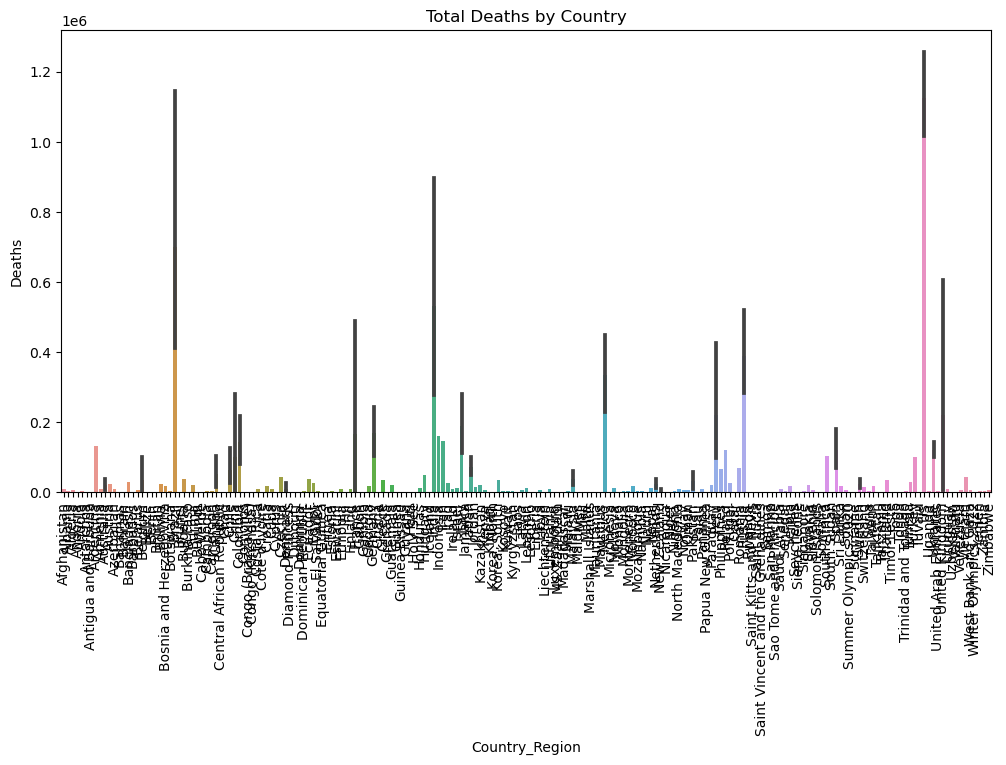

In [274]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Country_Region', y='Deaths', data=covid_df, estimator=sum)  
plt.title('Total Deaths by Country')
plt.xticks(rotation=90)
plt.show()


In [372]:
# Convert "Confirmed" column to float, coercing errors to NaN
covid_df['Deaths'] = pd.to_numeric(covid_df['Deaths'], errors='coerce').astype(float)


In [378]:
X = covid_df['Deaths']
y = covid_df['Confirmed']

# Adding a constant to the independent variables
X = sm.add_constant(X)

# Creating the multiple linear regression model
lin_reg = sm.OLS(y, X)

# Fitting the model
model = lin_reg.fit()

# Displaying the summary
print_model = model.summary()
print_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Confirmed   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     4203.
Date:                Fri, 12 Jan 2024   Prob (F-statistic):               0.00
Time:                        11:14:53   Log-Likelihood:                -60004.
No. Observations:                4016   AIC:                         1.200e+05
Df Residuals:                    4014   BIC:                         1.200e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.093e+04    1.2e+04      1.746      0.081   -2577.181    4.44e+04
Deaths        86.0996      1.328     64.834      0.000      83.496      88.703
==============================================================================
Omnibus:                     9259.255   Durbin-Watson:                   1.877
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        105201462.814
Skew:                          21.935   Prob(JB):                         0.00
Kurtosis:                     794.688   Cond. No.                     9.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""



The regression model explains approximately 51.2% of the variability in the longitude (Long_). This suggests a moderate fit.
Coefficients:

Coefficient for Deaths: 86.1065
For every one-unit increase in Deaths, the estimated longitude increases by 86.1065 units.

Coefficient for Case_Fatality_Ratio: -73.3288
For every one-unit increase in Case_Fatality_Ratio, the estimated longitude decreases by 73.3288 units.

Statistical Significance:

The regression model is statistically significant (F-statistic = 2102.0, p-value < 0.05), indicating that at least one of the predictors is related to the dependent variable.
Variable Significance:

Both Deaths and Case_Fatality_Ratio have statistically significant effects on the longitude (Long_) based on their low p-values.

Goodness of Fit:

The adjusted R-squared (0.511) accounts for the number of predictors and indicates the model's goodness of fit.

The regression analysis suggests that there is a statistically significant relationship between the longitude and the variables Deaths and Case_Fatality_Ratio. The coefficients provide insights into the direction and strength of these relationships.

/var/folders/sj/ywjylck164159vcw2b_d55tw0000gp/T/ipykernel_34501/997889695.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


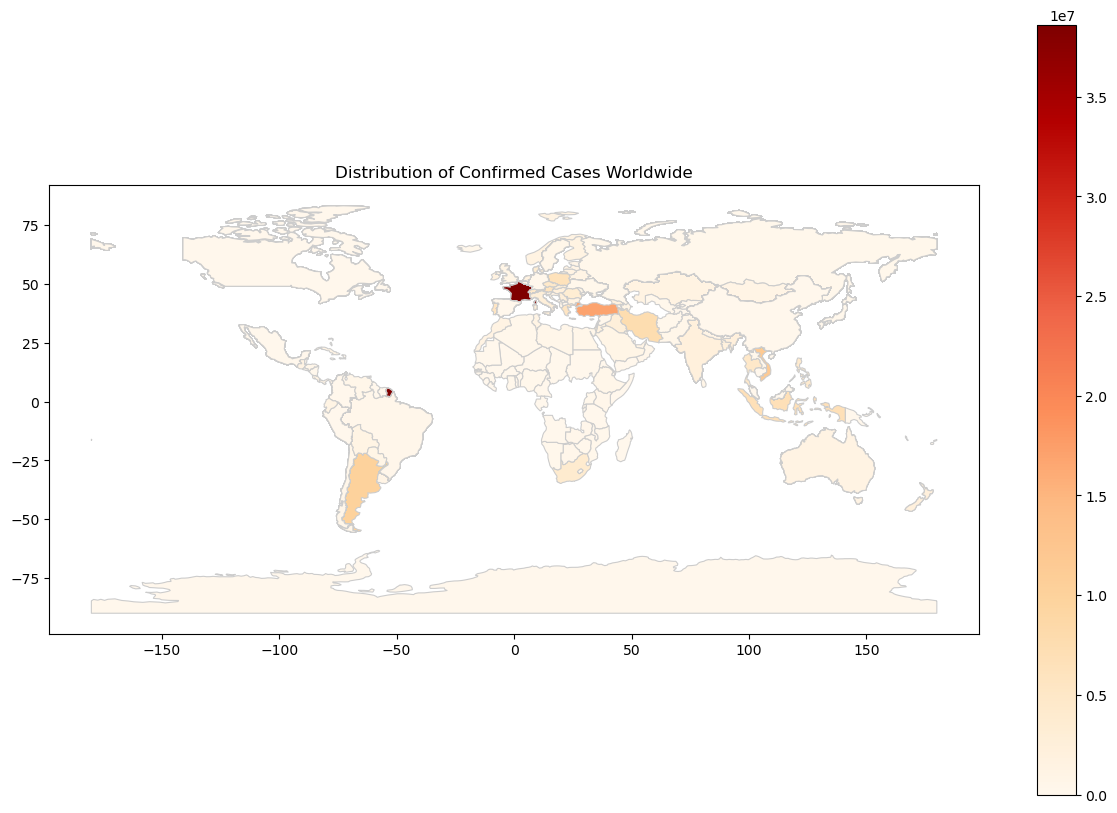

In [352]:
import geopandas as gpd
import matplotlib.pyplot as plt

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

merged = world.merge(covid_df, how='left', left_on='name', right_on='Country_Region')

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='Confirmed', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Distribution of Confirmed Cases Worldwide')
plt.show()
